# 1. SQL QUERY 




SELECT *

FROM `ftds-hacktiv8-project.phase1_ftds_001_hck.credit-card-information`

WHERE MOD(CUST_ID, 2) = 1;


___

# 2. INTRODUCTION

**1.1 Identity**
- Name : Daniel Satria
- Batch : HCK-001


**1.2 Dataset Explanation**
- The dataset is about information of credit card user.
- Since I'm in batch HCK-001 / Batch, I query the CUST_ID of dataset to get the odd index only from the original dataset.


**1.3 Objective**
- Getting insight from the dataset / EDA.
- Creating machine learning model and test it to our dataset to makes clustering of dataset.
- Creating model evaluation and model improvement.
- Drawing conclusion from overall milestone project.

**1.4 Notebook Disclaimer**
- I will do the title/explanation first, then later write the code.
- The title means to explain what I do or try to do with the code or to explain the output of the code itself.

___

# 3. IMPORT LIBRARY

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

___

# 4. DATA LOADING

4.1 Loading dataset
- Here I load the dataset that will be used for this Graded Challenge 4.
- I use head and tail method to show the first 5 and the last 5 of the dataset as shown below.

In [55]:
df = pd.read_csv('h8dsft_P1G4_daniel_satria.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [56]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


____

# 5. EDA / Exploratory Data Analysis

5.1 Dataset shape
- There are 4475 rows and 18 columns in our dataset.

In [57]:
df.shape

(4475, 18)

5.2 Checking missing value
- There is 155 missing value in our dataset.
- All of them are in MINIMUM_PAYMENTS column.
- I decide not to drop the missing value but to handle it instead.
- The handling step, I will perform it in Feature Engineering / Data Preprocessin in next section.

In [58]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

5.3 Checking duplicated data
- There is no duplicated data in our dataset.

In [75]:
df.duplicated().sum()

0

5.4 Getting data inference
- Set the seed of random set, so we can call the data inference without randomly generated again later.
- Here I take two rows, and as we could see below there is no missing value in the data inference included.
- We got the data from index 88 & 4189.

In [89]:
# assign random seed, so the data inference won't randomly be generated all over again whenever we call it
np.random.seed(77)

# taking the 2 data inference from our dataset
data_inf = df.sample(2)
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
775,5129,77.321718,1.0,278.44,0.00,278.44,0.000000,1.000000,0.000000,1.00,0.000000,0,18,2500.0,342.843624,173.361571,0.0,12
3385,7737,283.899006,1.0,818.69,519.49,299.20,947.496827,0.833333,0.166667,0.75,0.083333,1,15,8000.0,4618.241000,199.905433,0.0,12


5.5 Dropping data inference from original dataset
- Dropping the data inference from the dataset, so later we can test the model with brand new data.
- Now, our total dataset have 4473 rows.

In [88]:
df.drop(index=data_inf.index, inplace=True)
df.shape

(4473, 18)

5.6 Getting insight from describe
- It seems that most the columns are continous number.
- The categorigal columns is TENURE, since it's the only column that have discreet value.

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4473.0,4473.840599,2583.925070,1.000000,2237.000000,4473.000000,6709.000000,8949.00000
BALANCE,4473.0,1562.950492,2072.004825,0.000000,124.580010,871.355430,2046.306856,18495.55855
BALANCE_FREQUENCY,4473.0,0.876919,0.238267,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4473.0,1003.626092,2060.416103,0.000000,39.580000,360.000000,1104.650000,41050.40000
ONEOFF_PURCHASES,4473.0,596.562714,1653.766827,0.000000,0.000000,45.650000,576.000000,40624.06000
INSTALLMENTS_PURCHASES,4473.0,407.292245,880.954593,0.000000,0.000000,88.870000,456.000000,14686.10000
CASH_ADVANCE,4473.0,983.670238,2060.093021,0.000000,0.000000,0.000000,1136.000468,47137.21176
PURCHASES_FREQUENCY,4473.0,0.490743,0.402914,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4473.0,0.202336,0.298254,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4473.0,0.364049,0.397617,0.000000,0.000000,0.166667,0.750000,1.00000


5.7 Getting pattern by plotting some of columns
- Here I use scatter plot to find if there's any pattern cluster of the data.
- As we can see, there is no clear pattern for clustering in below plots even the columns have correlation one another.
- Value number 12 from TENURE column seems to dominate the plot.

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

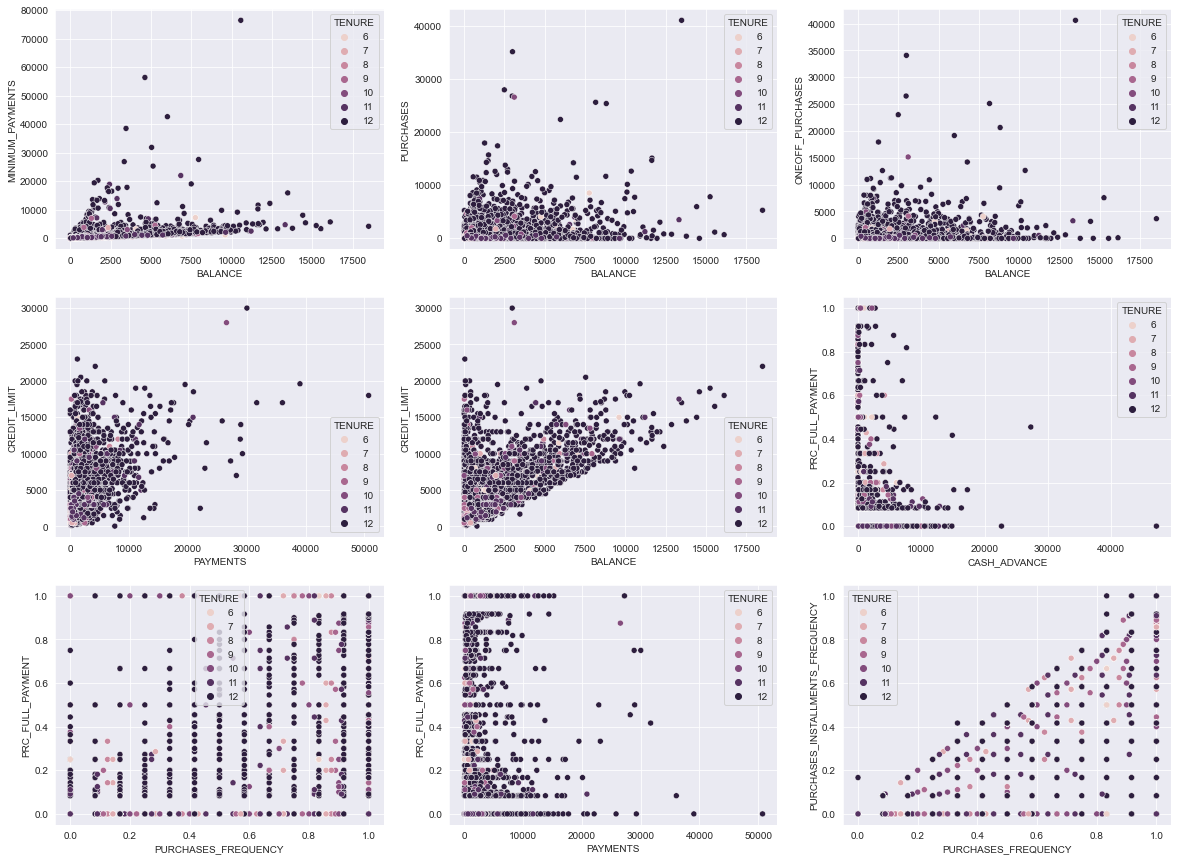

In [127]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(3,3, figsize=(20,15))
sns.scatterplot(data=df, x='BALANCE', y='MINIMUM_PAYMENTS', hue='TENURE', ax=ax[0,0])
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='TENURE', ax=ax[0,1])
sns.scatterplot(data=df, x='BALANCE', y='ONEOFF_PURCHASES', hue='TENURE', ax=ax[0,2])
sns.scatterplot(data=df, x='PAYMENTS', y='CREDIT_LIMIT', hue='TENURE', ax=ax[1,0])
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT', hue='TENURE', ax=ax[1,1])
sns.scatterplot(data=df, x='CASH_ADVANCE', y='PRC_FULL_PAYMENT', hue='TENURE', ax=ax[1,2])
sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PRC_FULL_PAYMENT', hue='TENURE', ax=ax[2,0])
sns.scatterplot(data=df, x='PAYMENTS', y='PRC_FULL_PAYMENT', hue='TENURE', ax=ax[2,1])
sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='TENURE', ax=ax[2,2])

5.8 Insight from tenure column
- As I said previously, the value 12 in this column have the highest amount among others.

<AxesSubplot:xlabel='TENURE', ylabel='count'>

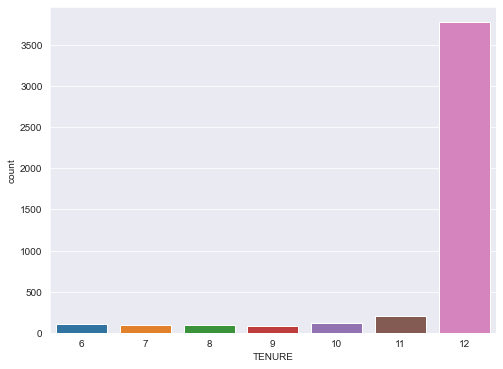

In [125]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x='TENURE')

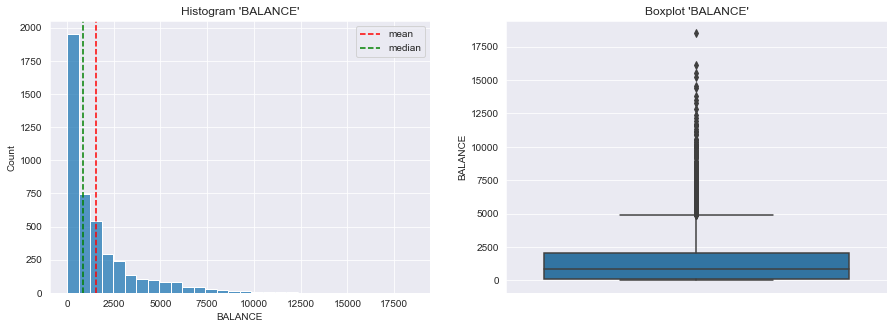

BALANCE Kurtosis: 7.187420148513244
BALANCE Skewness: 2.330175072863143
Columns 'BALANCE' is right skewed


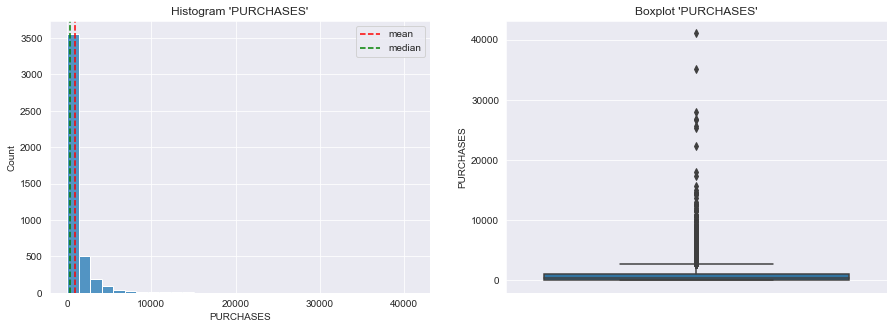

PURCHASES Kurtosis: 85.09855783668954
PURCHASES Skewness: 7.07042969254684
Columns 'PURCHASES' is right skewed


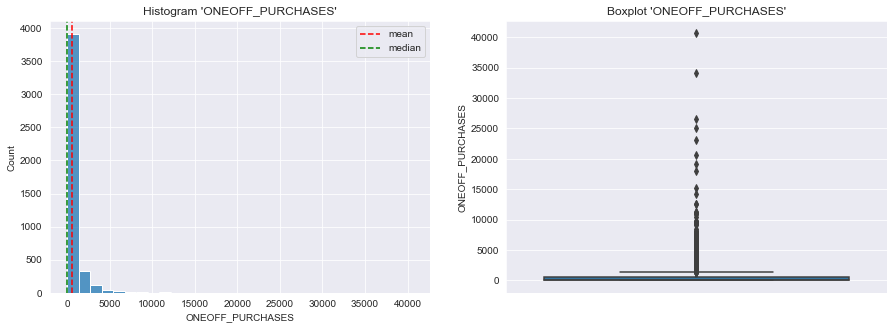

ONEOFF_PURCHASES Kurtosis: 164.0440610944369
ONEOFF_PURCHASES Skewness: 9.949016180718505
Columns 'ONEOFF_PURCHASES' is right skewed


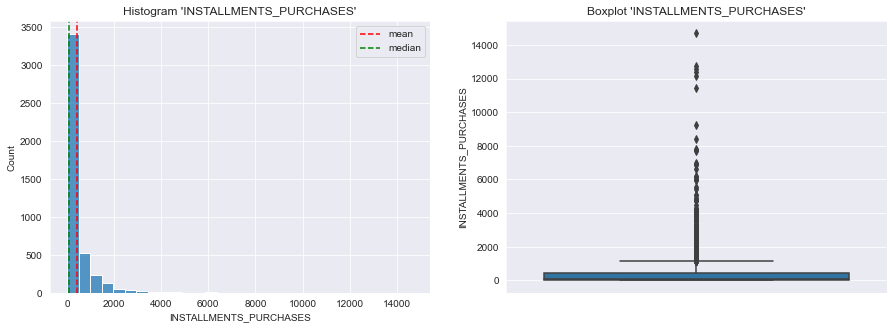

INSTALLMENTS_PURCHASES Kurtosis: 65.31291642079081
INSTALLMENTS_PURCHASES Skewness: 6.329547201059427
Columns 'INSTALLMENTS_PURCHASES' is right skewed


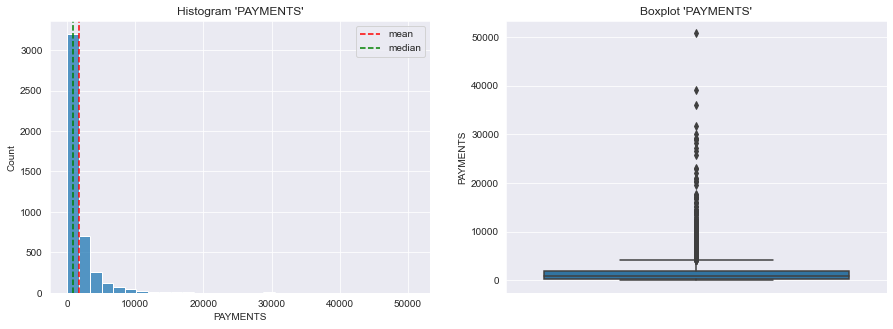

PAYMENTS Kurtosis: 54.79434288400963
PAYMENTS Skewness: 5.7501803344598885
Columns 'PAYMENTS' is right skewed


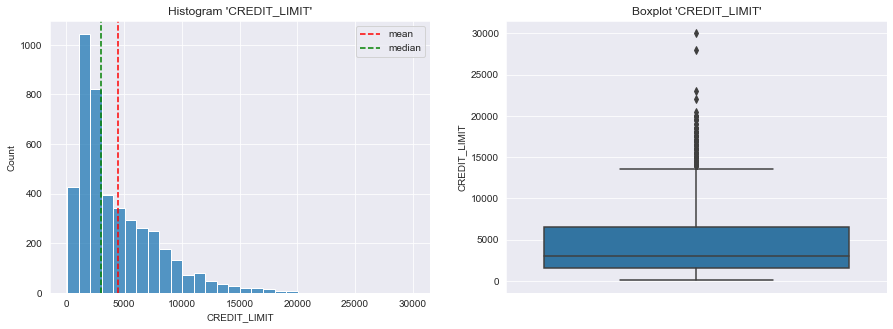

CREDIT_LIMIT Kurtosis: 2.7761758653960773
CREDIT_LIMIT Skewness: 1.4984343924825754
Columns 'CREDIT_LIMIT' is right skewed


In [128]:
#making function for plotting the distribution of the data
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' is right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' is left skewed".format(col))

#plotting the distribution data of limit_balance
plot_dist(df, 'BALANCE')
plot_dist(df, 'PURCHASES')
plot_dist(df, 'ONEOFF_PURCHASES')
plot_dist(df, 'INSTALLMENTS_PURCHASES')
plot_dist(df, 'PAYMENTS')
plot_dist(df, 'CREDIT_LIMIT')

____

# 5. FEATURE ENGINEERING & PRE-PROCESSING

5.1 Handling missing value
- To handling missing value, here  use KNN Imputer from sklearn.
- By using KNN Imputer, the missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.
- Since the result will be array, here I assign it to dataframe again and rename the column names.


In [138]:
from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=7)
handle_nan = impute_knn.fit_transform(df)

df_handle_nan = pd.DataFrame(handle_nan)
df_handle_nan.columns = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

df_handle_nan.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091.0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,500.0,0.000000,167.886218,0.0,8.0
1,5069.0,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,7000.0,0.000000,120.018849,0.0,8.0
2,6075.0,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0.0,6.0,1200.0,1494.480376,2638.598410,0.0,8.0
3,6291.0,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1200.0,3029.380326,85.428885,0.0,8.0
4,7755.0,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,215.316424,137.846006,0.0,8.0


5.2 Rechecking the missing value
- Here we try to recheck the missing, whether all of them are handle or still there is left.
- As shown below, all the missing value have been imputed and handled by KNN Imputer, so there is no missing values left.

In [140]:
df_handle_nan.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

5.3 Checking Multi-colinearity
- Before checking the multi-colinearity, we divide the number and category column.
- We calculate the VIF coefficient using statsmodels library.
- Here, I could see that there are 7 columns that have VIF coefficient more than 5.
- So, at least we could reduce the dimention to 8.

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#group the number columns
number_columns = df_handle_nan[['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

#gorup the category columns
category_columns = df_handle_nan['TENURE']

#making dataframe for VIF calculations
vif_data = pd.DataFrame()
vif_data["feature"] = number_columns.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(number_columns.values, i) for i in range(len(number_columns.columns))]

#soring the VIF value
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
3,PURCHASES,54330.785550
4,ONEOFF_PURCHASES,31981.220366
5,INSTALLMENTS_PURCHASES,9718.667778
7,PURCHASES_FREQUENCY,26.524088
9,PURCHASES_INSTALLMENTS_FREQUENCY,17.192171
2,BALANCE_FREQUENCY,7.454899
8,ONEOFF_PURCHASES_FREQUENCY,5.620999
10,CASH_ADVANCE_FREQUENCY,4.793791
12,PURCHASES_TRX,4.273567
13,CREDIT_LIMIT,4.168499


5.4 Scaling
- Here I will Standard Scaler tto scale the number columns.
- However, I will make two data that will be fitted to PCA.  
- The first data is the scaled data, another one is non-scaled data.
- So, we'll see which one is better.

In [247]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#fit the scaler
scaler = StandardScaler()
scaler.fit(number_columns)

#transform the x_train number and assign to dataframe
number_columns_scaled = scaler.transform(number_columns)
df_number_scaled = pd.DataFrame(number_columns_scaled)
df_number_scaled.head()

#finalizing the scaled data
data_scaled = pd.concat([df_number_scaled, category_columns], axis=1)

#finalizing the non-scaled data, we take from df_handle_nan dataframe
data_non_scaled = df_handle_nan

5.4 Dimensionality Reduction
- Here use PCA to reduce the dimension of dataset.
- Based on VIF column, I will set the components to 9.
- This result of PCA I will use to : (1.) visualizing the data & (2.) referencing to make cluster for KMeans.
- Here I use both scaled and non-scaled data, and assign them to different variables.
- As we can see below, the non-scaled EVR is higher then scaled one.

In [268]:
from sklearn.decomposition import PCA

pca_scaled = PCA(n_components=9).fit(data_scaled)
data_transformed__non_scaledpca_non_scaled = PCA(n_components=9).fit(data_non_scaled)

data_transformed_scaled = pca_scaled.transform(data_scaled)
data_transformed_non_scaled = pca_non_scaled.transform(data_non_scaled)

print('Total EVR scaled :', np.sum(pca_scaled.explained_variance_ratio_))
print('Total EVR non-scaled :', np.sum(pca_non_scaled.explained_variance_ratio_))

Total EVR scaled : 0.8642183356246629
Total EVR non-scaled : 0.99999877425492


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


5.5 PCA Evaluation
- It seems that the non-scaled one have better result than the scaled one.
- In the non-scaled pca, we can clearly see the elbow.
- Even with 8 features / dimension, we almost can grab the information from the data set.

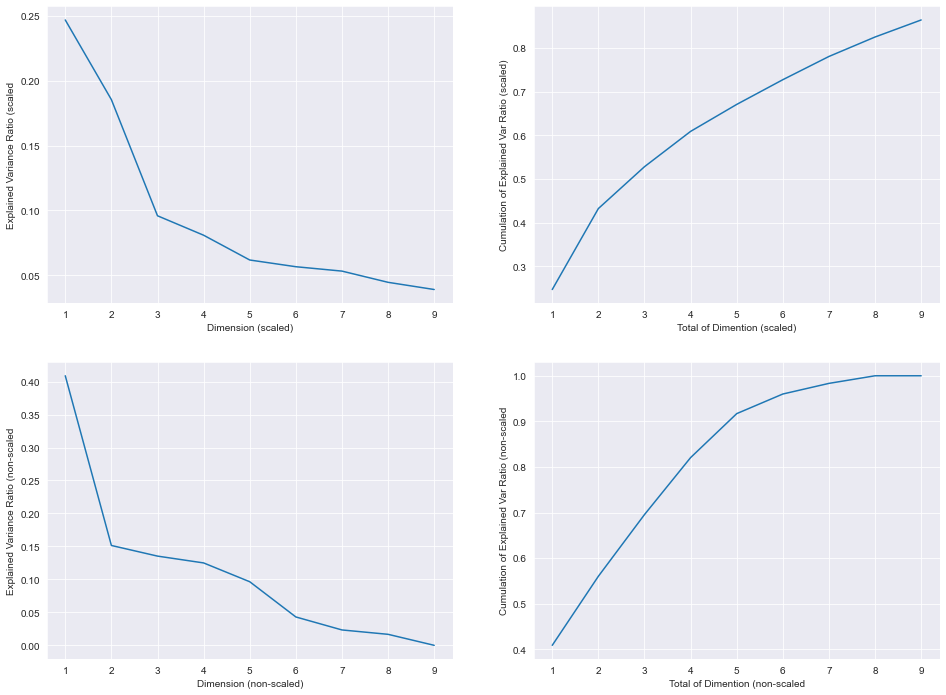

In [269]:
fig,ax=plt.subplots(2,2,figsize=(16,12))
ax[0,0].plot(range(1,10),pca_scaled.explained_variance_ratio_)
ax[0,0].set_xlabel('Dimension (scaled)')
ax[0,0].set_ylabel('Explained Variance Ratio (scaled')

ax[0,1].plot(range(1,10),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[0,1].set_xlabel('Total of Dimention (scaled)')
ax[0,1].set_ylabel('Cumulation of Explained Var Ratio (scaled)')

ax[1,0].plot(range(1,10),pca_non_scaled.explained_variance_ratio_)
ax[1,0].set_xlabel('Dimension (non-scaled)')
ax[1,0].set_ylabel('Explained Variance Ratio (non-scaled')

ax[1,1].plot(range(1,10),np.cumsum(pca_non_scaled.explained_variance_ratio_))
ax[1,1].set_xlabel('Total of Dimention (non-scaled')
ax[1,1].set_ylabel('Cumulation of Explained Var Ratio (non-scaled')
plt.show()


5.6 Visualizing data with reduced dimention of dataset by PCA
- Here I use the pca transformed data, that previously have been dimensionally reduced to visualize it.
- To visualize it I use the first two dimension.
- As plot shown below, we still can't distinguish one data to another both from scaled and non-scaled one.

<AxesSubplot:>

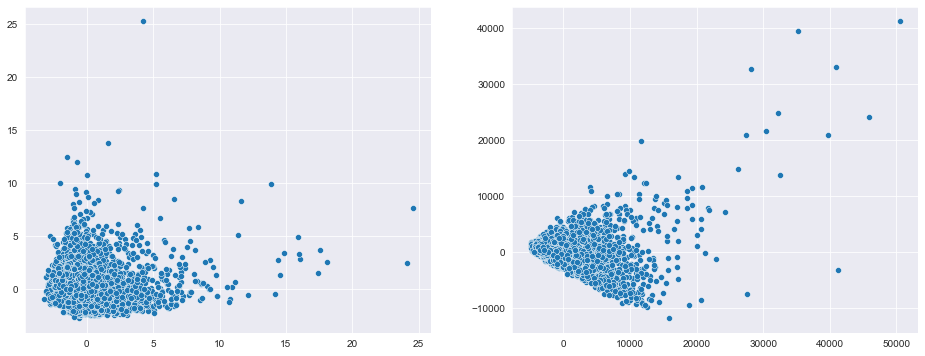

In [274]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.scatterplot(x=data_transformed_scaled[:,0], y=data_transformed_scaled[:,1], ax=ax[0])
sns.scatterplot(x=data_transformed_non_scaled[:,0], y=data_transformed_non_scaled[:,1], ax=ax[1])

___

# 6. Clustering with KMeans

6.1 Model definiton, fit and  predict
- Here I use 8 cluster based on previous research that 8 dimension will be the best.

In [275]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=892)
y_predict = kmeans.fit_predict(data_non_scaled)

In [280]:
from sklearn.metrics import silhouette_score

silhouette_score(data_non_scaled, kmeans.labels_)

0.2590704405973894

In [288]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_non_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(data_non_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

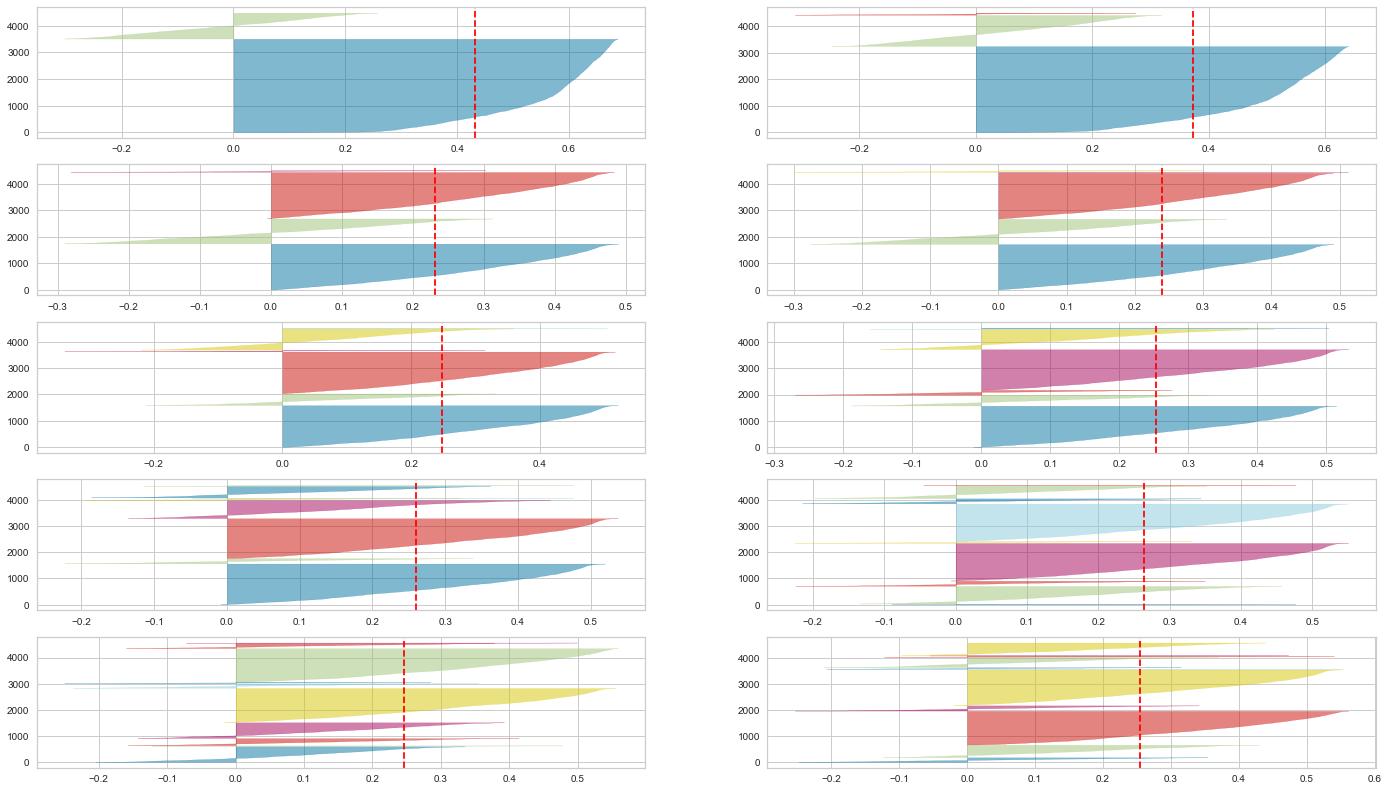

In [308]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(24, 14))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_non_scaled)

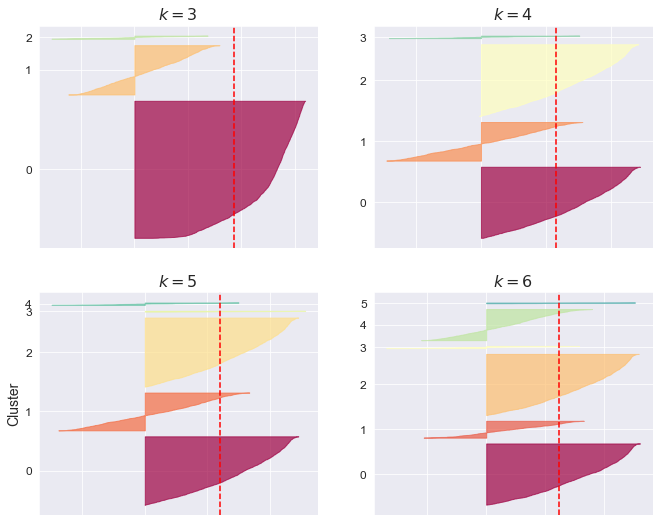

In [297]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_non_scaled, y_pred)

    padding = len(data_non_scaled) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (5, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()